<a href="https://colab.research.google.com/github/DangTrungNhut/Artificial_Intelligence_Course/blob/main/GK_face_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

#Kết nối với drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Giai nen tập dữ liệu rar
!apt-get install -y unrar

rar_file_path = "/content/drive/MyDrive/AI/data/face/Data_Face.rar" 
extract_path = "/content/drive/MyDrive/AI/data/face" 
!unrar x '{rar_file_path}' '{extract_path}'

In [ ]:
# Khai báo các thông số cho việc train mô hình
batch_size = 32
epochs = 40
num_classes = 7
input_shape = (30, 40, 3)

In [ ]:
# Chuẩn bị dữ liệu huấn luyện và xác thực
train_data = '/content/drive/MyDrive/AI/data/face/Data_Face/Train'
valid_data = '/content/drive/MyDrive/AI/data/face/Data_Face/Test'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dataset = train_datagen.flow_from_directory(train_data, target_size=input_shape[:2], batch_size=batch_size, class_mode='categorical')

Found 455 images belonging to 7 classes.


In [ ]:
validation_dataset = validation_datagen.flow_from_directory(valid_data, target_size=input_shape[:2], batch_size=batch_size, class_mode='categorical')

Found 56 images belonging to 7 classes.


In [ ]:
train_dataset.class_indices

{'An Tan': 0,
 'Dat': 1,
 'Minh Tan': 2,
 'Minh Thanh': 3,
 'Nhan': 4,
 'Nhut': 5,
 'Thanh': 6}

In [ ]:
# Xây dựng mô hình CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64,(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')])

In [ ]:
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 38, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 19, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 17, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 6, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 3, 128)        0

In [ ]:
history = model.fit(train_dataset,epochs=epochs, validation_data=validation_dataset)

Epoch 1/40
15/15 [==============================] - 8s 167ms/step - loss: 1.9059 - accuracy: 0.2396 - val_loss: 1.8766 - val_accuracy: 0.2321
Epoch 2/40
15/15 [==============================] - 2s 156ms/step - loss: 1.7518 - accuracy: 0.3582 - val_loss: 1.6879 - val_accuracy: 0.3036
Epoch 3/40
15/15 [==============================] - 2s 147ms/step - loss: 1.4233 - accuracy: 0.4484 - val_loss: 1.2632 - val_accuracy: 0.5000
Epoch 4/40
15/15 [==============================] - 3s 164ms/step - loss: 1.0938 - accuracy: 0.6000 - val_loss: 0.8921 - val_accuracy: 0.6786
Epoch 5/40
15/15 [==============================] - 3s 227ms/step - loss: 0.7590 - accuracy: 0.7385 - val_loss: 0.7211 - val_accuracy: 0.7143
Epoch 6/40
15/15 [==============================] - 2s 154ms/step - loss: 0.4759 - accuracy: 0.8462 - val_loss: 0.5678 - val_accuracy: 0.7143
Epoch 7/40
15/15 [==============================] - 2s 154ms/step - loss: 0.4718 - accuracy: 0.8176 - val_loss: 1.2382 - val_accuracy: 0.6429
Epoch 

In [ ]:
# Save model
model.save('/content/drive/MyDrive/AI/Report/face_images.h5')

In [ ]:
from keras.models import load_model
classification_face_model = load_model('/content/drive/MyDrive/AI/Report/face_images.h5')

In [ ]:
score=classification_face_model.evaluate(validation_dataset, verbose=0)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

Test loss =  0.11310616880655289
Test accuracy =  0.9642857313156128


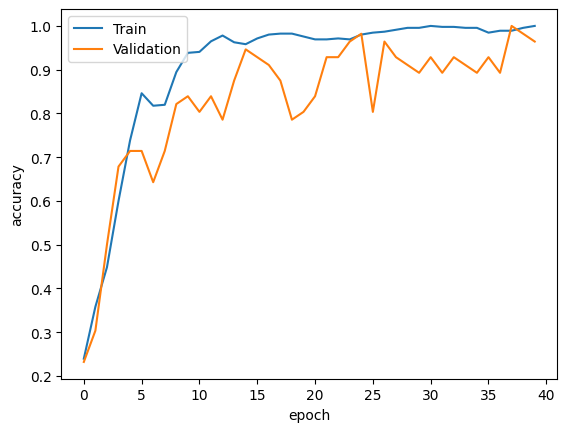

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 99ms/step
Predict is:  An Tan


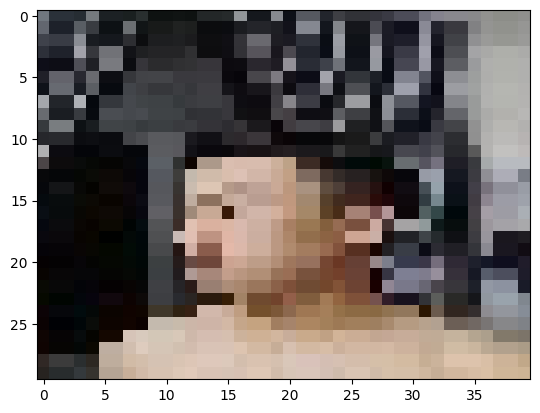

In [ ]:
img = load_img('/content/drive/MyDrive/AI/data/face/Data_Face/Test/An Tan/Tan1.jpg',target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,30,40,3)
img = img.astype('float32')
img = img/255
Label = ['An Tan','Dat','Minh Tan','Minh Thanh','Nhan','Nhut','Thanh']
print('Predict is: ',Label[int(np.argmax(classification_face_model.predict(img),axis=-1))])


1/1 [==============================] - 0s 43ms/step
Predict is:  Nhut


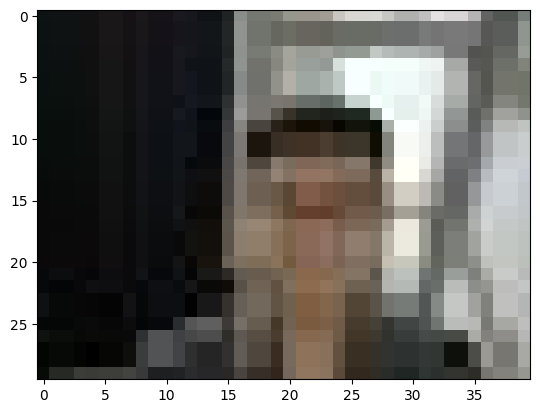

In [ ]:
img = load_img('/content/drive/MyDrive/AI/data/face/Data_Face/Test/Nhut/Nhut (3).jpg',target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,30,40,3)
img = img.astype('float32')
img = img/255
Label = ['An Tan','Dat','Minh Tan','Minh Thanh','Nhan','Nhut','Thanh']
print('Predict is: ',Label[int(np.argmax(classification_face_model.predict(img),axis=-1))])

1/1 [==============================] - 0s 48ms/step
Predict is:  Thanh


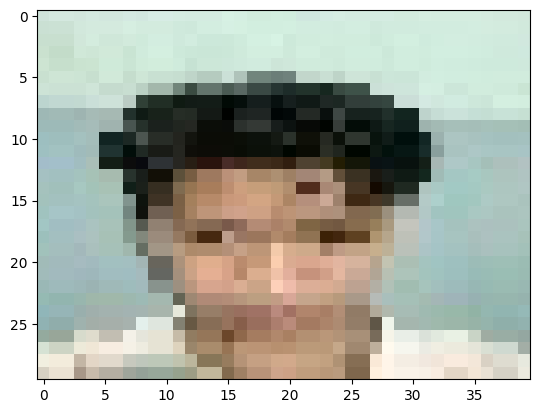

In [ ]:
img = load_img('/content/drive/MyDrive/AI/data/face/Data_Face/Test/Thanh/thanh2(1).jpg',target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,30,40,3)
img = img.astype('float32')
img = img/255
Label = ['An Tan','Dat','Minh Tan','Minh Thanh','Nhan','Nhut','Thanh']
print('Predict is: ',Label[int(np.argmax(classification_face_model.predict(img),axis=-1))])